In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [4]:
iris=load_iris()

In [5]:
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [10]:
data['species']=iris.target

In [13]:
target=np.unique(iris.target)
target_n=np.unique(iris.target_names)
target_dict= dict(zip(target,target_n))
data['species']=data['species'].replace(target_dict)

In [14]:
x=data.drop(columns="species")
y=data["species"]
names_features=x.columns
target_labels=y.unique()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)  

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)

In [18]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=93)

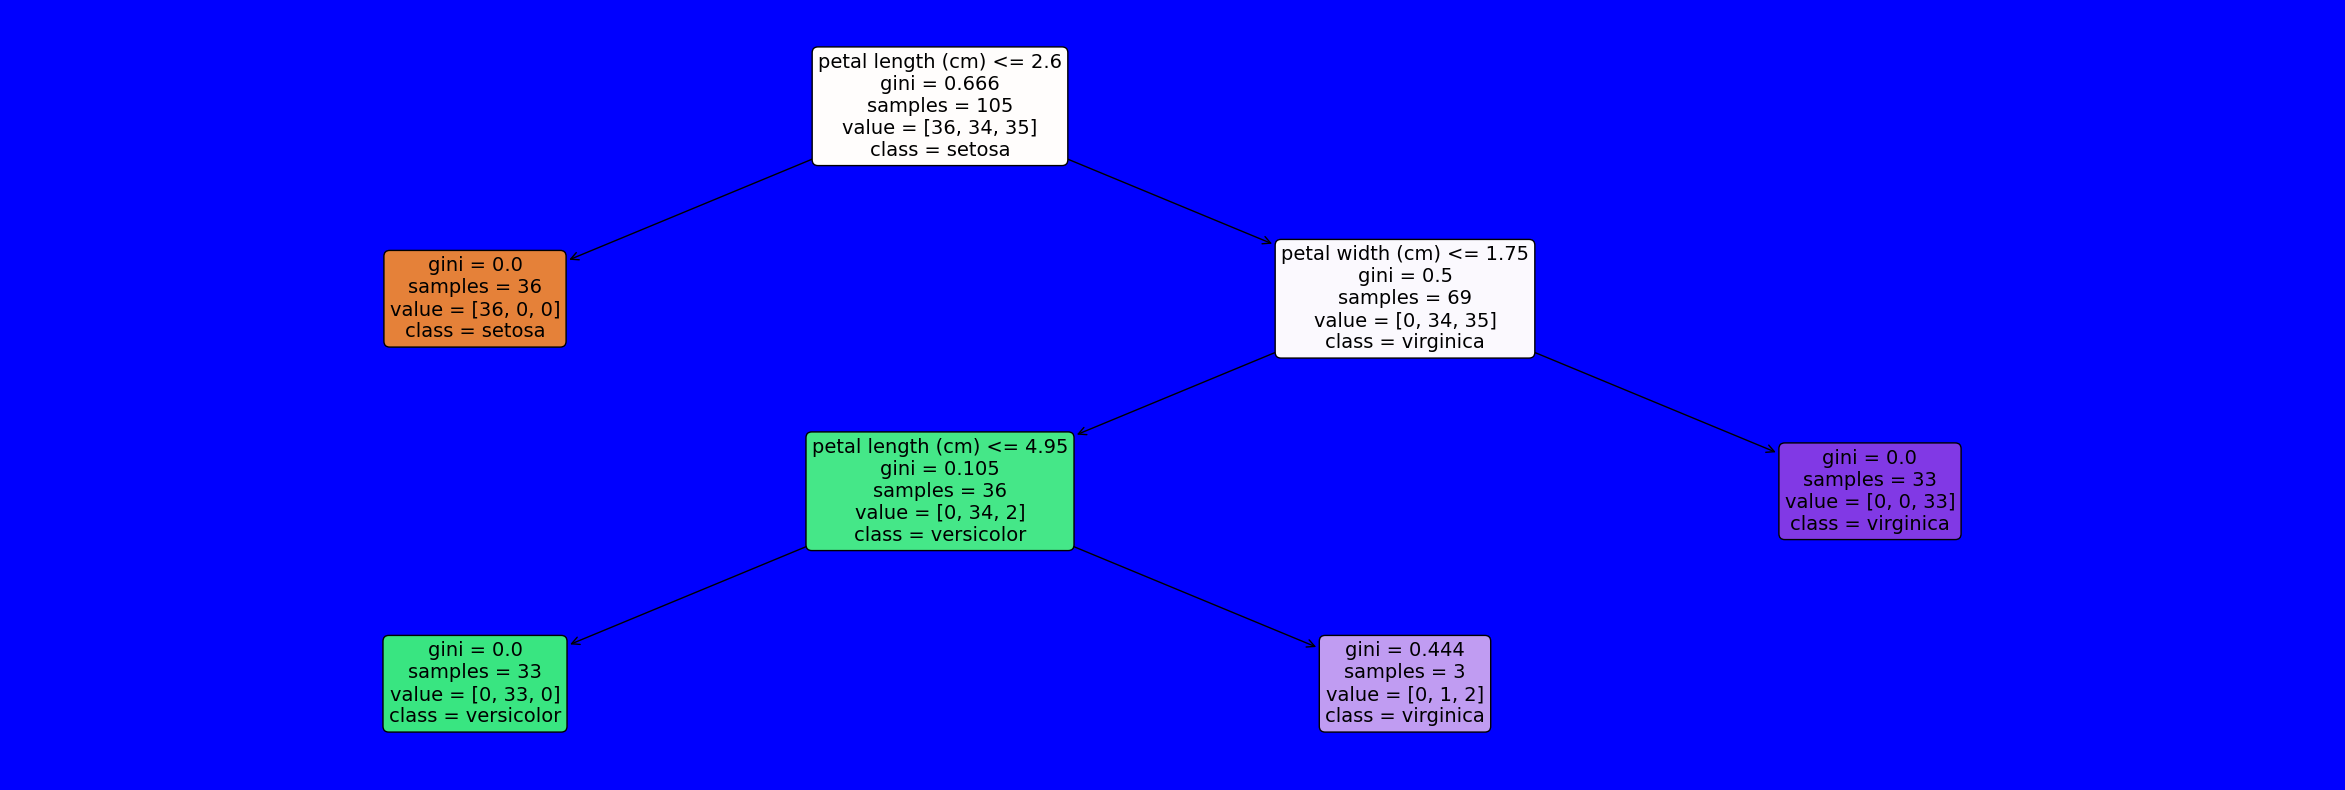

In [19]:
plt.figure(figsize = (30, 10), facecolor = 'b')  
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)  
plt.show()  
y_pred = dtc.predict(x_test)

<Figure size 1000x700 with 0 Axes>

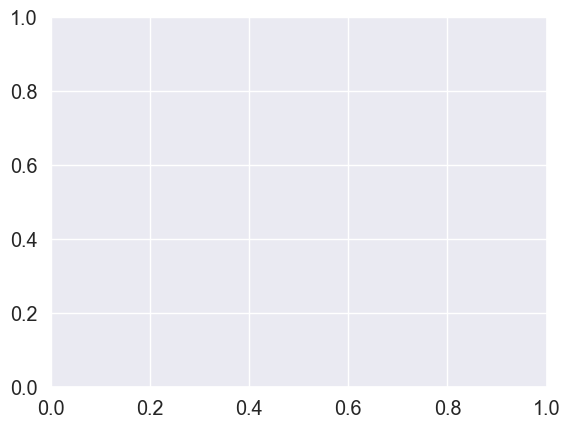

<Figure size 1000x700 with 0 Axes>

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix)  
axis = plt.axes()  
sns.set(font_scale = 1.3)  
plt.figure(figsize = (10,7))

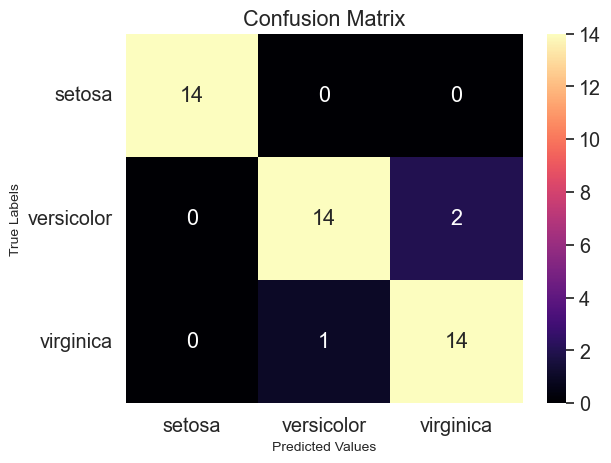

In [23]:
ax=sns.heatmap(matrix, annot = True, fmt = "g", cmap = "magma")  
ax.set_title('Confusion Matrix')  
ax.set_xlabel("Predicted Values", fontsize = 10)  
ax.set_xticklabels([''] + target_labels)  
ax.set_ylabel( "True Labels", fontsize = 10)  
ax.set_yticklabels(list(target_labels), rotation = 0)  
plt.show() 